# Problem Statement
- Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.
- The Walmart team wants to analyze customer purchase behaviour (especially purchase amount) against the customer's gender and various other factors that help business make better decisions.
- In this problem, we are going to analyze the sample data using Confidence Interval and Central Limit Theorem to infer some statistics about the population. This may include how gender, age-group, marital status etc have an impact on Purchase amount.
- The statistics will help the business team to make better decisions so as to increase sale.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [87]:
df = pd.read_csv('walmart.csv')
df.shape

(550068, 10)

In [88]:
df.sample(100).head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
531371,1003825,P00028442,M,18-25,1,B,0,0,1,7700
199780,1000869,P00116142,M,18-25,20,A,4+,1,10,14627
126278,1001455,P00126842,F,46-50,0,B,1,1,8,7792
417,1000073,P00074442,M,18-25,4,A,4+,0,1,11822
112761,1005395,P00260142,M,51-55,1,C,1,1,5,3432


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [90]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [91]:
df['Age'].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [92]:
df['Gender'].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [93]:
df['City_Category'].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [94]:
df['Marital_Status'].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

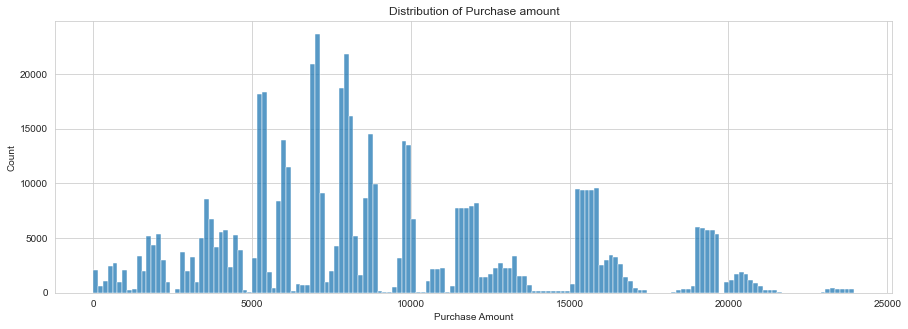

In [95]:
plt.figure(figsize=(15,5))
sns.histplot(x=df['Purchase'])
plt.title("Distribution of Purchase amount")
plt.xlabel("Purchase Amount")
plt.show()

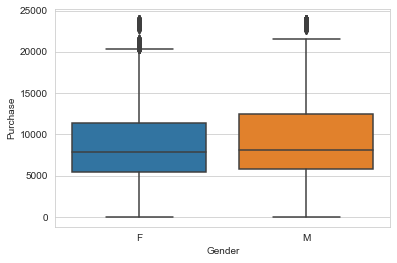

In [96]:
sns.boxplot(x='Gender',y='Purchase',data=df)
plt.show()

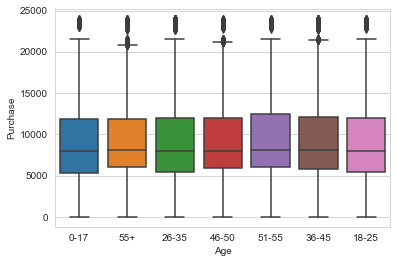

In [97]:
sns.boxplot(x='Age',y='Purchase',data=df)
plt.show()

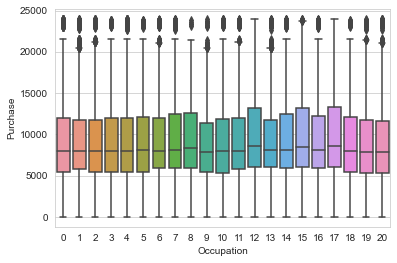

In [98]:
sns.boxplot(x='Occupation',y='Purchase',data=df)
plt.show()

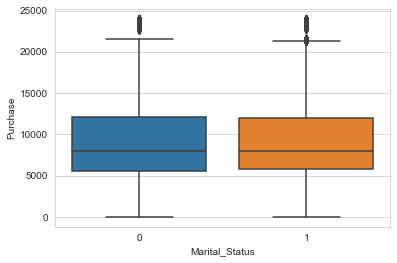

In [99]:
sns.boxplot(x='Marital_Status',y='Purchase',data=df)
plt.show()

## Missing Value and Outlier Detection

In [100]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [101]:
q1_purchase = np.percentile(df['Purchase'],0.25)
q3_purchase = np.percentile(df['Purchase'],0.75)
IQR= q3_purchase-q1_purchase
lower_lim = q1_purchase - 1.5*IQR
upper_lim = q3_purchase + 1.5*IQR
purchase_outliers = df[(df['Purchase']>upper_lim) | (df['Purchase']<lower_lim)]

In [102]:
lower_lim,upper_lim

(-579.0, 1125.0)

In [17]:
purchase_outliers.shape[0]/df.shape[0]

0.9777827468603881

<div class="alert alert-block alert-info">
<b>Point:</b> We are not going to remove outliers. Since they are people buying very expensive items and also there are people who can buy very cheap items. So all the data points are valid and not due to any data collection error.
</div>

In [18]:
df.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [19]:
df.groupby('Age')['User_ID'].nunique()

Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64

In [20]:
df.groupby('Marital_Status')['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

In [21]:
female_users = df[df['Gender']=='F']
male_users = df[df['Gender']=='M']

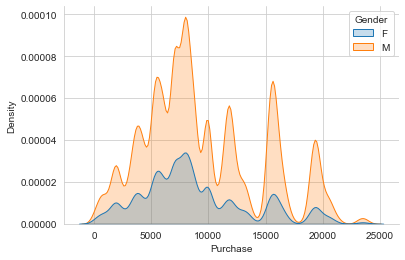

In [22]:
sns.set_style('whitegrid')
sns.kdeplot(data=df, x='Purchase', hue='Gender', fill=True)
sns.despine()
plt.show()


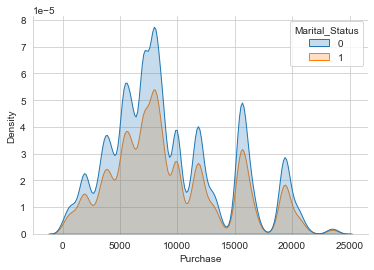

In [23]:
sns.set_style('whitegrid')
sns.kdeplot(data=df, x='Purchase', hue='Marital_Status', fill=True)
sns.despine()
plt.show()


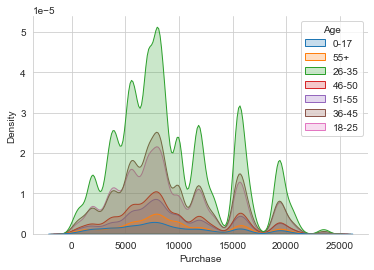

In [24]:
sns.set_style('whitegrid')
sns.kdeplot(data=df, x='Purchase', hue='Age', fill=True)
sns.despine()
plt.show()


<div class="alert alert-block alert-info">
<b>Point:</b> From the above 3 distribution plots we can infer 3 points:</br>
* Males spend more than Females.</br>
* Single people spend more than married people.</br>
* Age group 26-35 spend the max.</br>
</div>

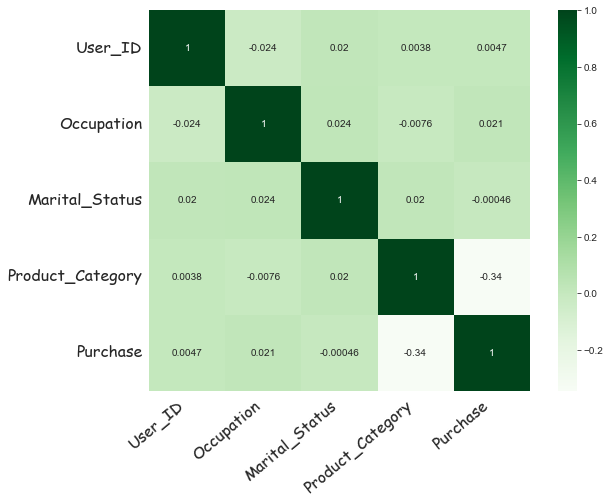

In [25]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(df.corr(),
            annot=True,cmap='Greens',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')
    
plt.show()

## Confidence Interval Analysis on Gender

### 90% -95% -99% Confidence Interval

In [26]:
male_samples = df[df['Gender']=='M']['Purchase']
female_samples = df[df['Gender']=='F']['Purchase']
print('male samples',male_samples.shape)
print('female samples',female_samples.shape)

male samples (414259,)
female samples (135809,)


In [27]:
r = 10000
n = 50000
male_sample_means = np.empty(r)
female_sample_means = np.empty(r)
for i in range(r):
    male_sample = np.random.choice(male_samples,n,replace=True)
    male_sample_means[i] = np.mean(male_sample)
    
    female_sample = np.random.choice(female_samples,n,replace=True)
    female_sample_means[i] = np.mean(female_sample)

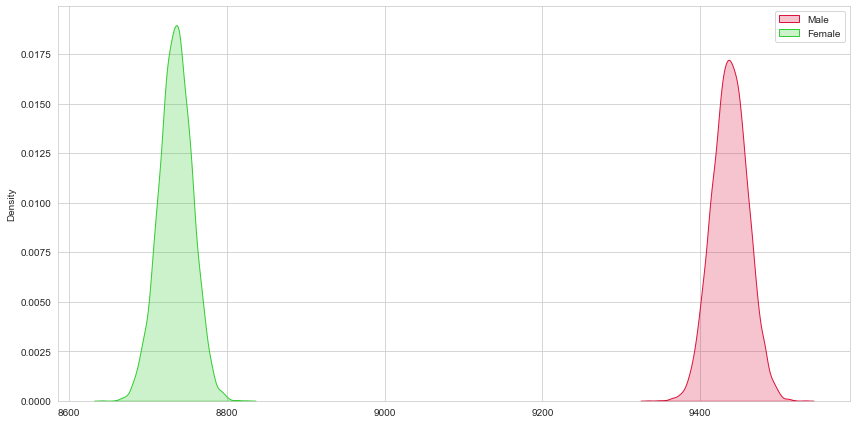

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=male_sample_means,
            color='crimson', label='Male', fill=True, ax=ax)
sns.kdeplot(data=female_sample_means,
            color='limegreen', label='Female', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()


In [29]:
male_mean_purchase_price = np.mean(male_sample_means)
male_purchase_price_std = np.std(male_sample_means)
print("Male mean purchase price",male_mean_purchase_price)
print("Male purchase price std",male_purchase_price_std)

Male mean purchase price 9437.339775808001
Male purchase price std 22.67179199077019


In [30]:
confidence_interval_male_90 = [np.percentile(male_sample_means,5),np.percentile(male_sample_means,95)] 
confidence_interval_male_90

[9400.269406, 9474.335852]

In [31]:
confidence_interval_male_95 = [np.percentile(male_sample_means,2.5),np.percentile(male_sample_means,97.5)]
confidence_interval_male_95

[9393.4538035, 9481.733141499999]

In [32]:
confidence_interval_male_99 = [np.percentile(male_sample_means,0.5),np.percentile(male_sample_means,99.5)]
confidence_interval_male_99

[9378.8366788, 9495.7710411]

In [34]:
female_mean_purchase_price = np.mean(female_sample_means)
female_purchase_price_std = np.std(female_sample_means)
print("Female mean purchase price",female_mean_purchase_price)
print("Female purchase price std",female_purchase_price_std)

Female mean purchase price 8734.513484054001
Female purchase price std 21.21011387833098


In [35]:
confidence_interval_female_90 = [np.percentile(female_sample_means,5),np.percentile(female_sample_means,95)] 
confidence_interval_female_90

[8699.173978, 8769.292903]

In [36]:
confidence_interval_female_95 = [np.percentile(female_sample_means,2.5),np.percentile(female_sample_means,97.5)]
confidence_interval_female_95

[8691.728662, 8775.676691]

In [37]:
confidence_interval_female_99 = [np.percentile(female_sample_means,0.5),np.percentile(female_sample_means,99.5)]
confidence_interval_female_99

[8679.5384663, 8790.0092952]

## Confidence Interval Analysis on Marital Status

## 90% -95% -99% Confidence Interval

In [38]:
single_samples = df[df['Marital_Status']==0]['Purchase']
married_samples = df[df['Marital_Status']==1]['Purchase']
print('single samples',single_samples.shape)
print('married samples',married_samples.shape)

single samples (324731,)
married samples (225337,)


In [39]:
r = 10000
n = 50000
single_sample_means = np.empty(r)
married_sample_means = np.empty(r)
for i in range(r):
    single_sample = np.random.choice(single_samples,n,replace=True)
    single_sample_means[i] = np.mean(single_sample)
    
    married_sample = np.random.choice(married_samples,n,replace=True)
    married_sample_means[i] = np.mean(married_sample)

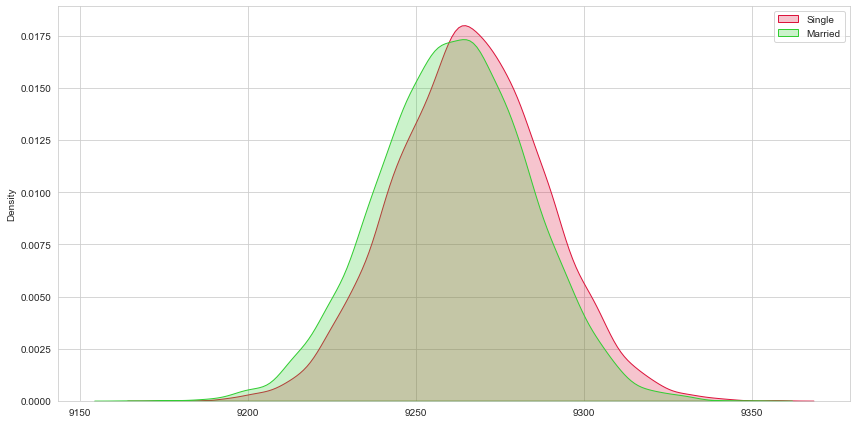

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=single_sample_means,
            color='crimson', label='Single', fill=True, ax=ax)
sns.kdeplot(data=married_sample_means,
            color='limegreen', label='Married', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()


In [51]:
single_mean_purchase_price = np.mean(single_sample_means)
single_purchase_price_std = np.std(single_sample_means)
print("Single mean purchase price",single_mean_purchase_price)
print("Single purchase price std",single_purchase_price_std)

Single mean purchase price 9265.636081206
Married purchase price std 22.840778816146486


In [42]:
married_mean_purchase_price = np.mean(married_sample_means)
married_purchase_price_std = np.std(married_sample_means)
print("Married mean purchase price",married_mean_purchase_price)
print("Married purchase price std",married_purchase_price_std)

Married mean purchase price 9261.153386298001
Married purchase price std 22.535596458812936


In [52]:
confidence_interval_single_90 = [np.percentile(single_sample_means,5),np.percentile(single_sample_means,95)] 
confidence_interval_single_90

[9228.114998000001, 9302.942362]

In [53]:
confidence_interval_single_95 = [np.percentile(single_sample_means,2.5),np.percentile(single_sample_means,97.5)] 
confidence_interval_single_95

[9221.410668, 9310.1858695]

In [54]:
confidence_interval_single_99 = [np.percentile(single_sample_means,0.5),np.percentile(single_sample_means,99.5)] 
confidence_interval_single_99

[9207.329832899999, 9324.6536586]

In [55]:
confidence_interval_married_90 = [np.percentile(married_sample_means,5),np.percentile(married_sample_means,95)] 
confidence_interval_married_90

[9224.58559, 9297.823997]

In [56]:
confidence_interval_married_95 = [np.percentile(married_sample_means,2.5),np.percentile(married_sample_means,97.5)] 
confidence_interval_married_95

[9217.096068, 9305.1160415]

In [57]:
confidence_interval_married_99 = [np.percentile(married_sample_means,0.5),np.percentile(married_sample_means,99.5)] 
confidence_interval_married_99

[9204.792315100001, 9319.143287500001]

## Confidence Interval on Age Group

### 95% Confidence Interval

In [71]:
df['Age'].value_counts()
samples_26_35 = df[df['Age']=='26-35']['Purchase']
samples_36_45 = df[df['Age']=='36-45']['Purchase']
samples_18_25 = df[df['Age']=='18-25']['Purchase']
samples_46_50 = df[df['Age']=='46-50']['Purchase']
samples_51_55 = df[df['Age']=='51-55']['Purchase']
samples_55 = df[df['Age']=='55+']['Purchase']
samples_0_17 = df[df['Age']=='0-17']['Purchase']

In [70]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [76]:
large_groups = ['26-35','36-45']
small_groups = ['18-25','46-50','51-55','55+','0-17']

r=10000
n_large=50000
n_small=10000


sample_means_18_25 = np.empty(r)
sample_means_46_50 = np.empty(r)
sample_means_51_55 = np.empty(r)
sample_means_55 = np.empty(r)
sample_means_0_17 = np.empty(r)
sample_means_36_45 = np.empty(r)
sample_means_26_35 = np.empty(r)

for i in range(r):
    sample_26_55 = np.random.choice(samples_26_35,n_large)
    sample_36_45 = np.random.choice(samples_36_45,n_large)
    
    sample_means_26_35[i] = np.mean(sample_26_55)
    sample_means_36_45[i] = np.mean(sample_36_45)
    
for i in range(r):
    sample_18_25 = np.random.choice(sample_26_35,n_small)
    sample_46_50 = np.random.choice(sample_26_35,n_small)
    sample_51_55 = np.random.choice(sample_26_35,n_small)
    sample_55 = np.random.choice(sample_26_35,n_small)
    sample_0_17 = np.random.choice(sample_26_35,n_small)
    
    
    sample_means_18_25[i] = np.mean(sample_18_25)
    sample_means_46_50[i] = np.mean(sample_46_50)
    sample_means_51_55[i] = np.mean(sample_51_55)
    sample_means_55[i] = np.mean(sample_55)
    sample_means_0_17[i] = np.mean(sample_0_17)
    

    

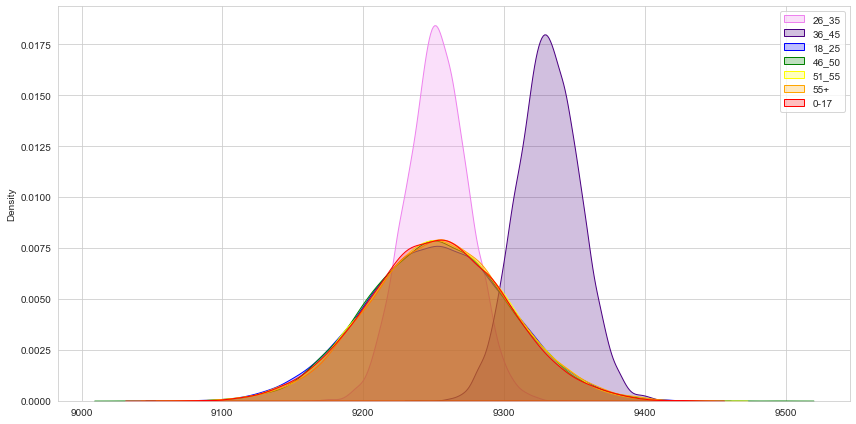

In [78]:

fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=sample_means_26_35,
            color='violet', label='26_35', fill=True, ax=ax)
sns.kdeplot(data=sample_means_36_45,
            color='indigo', label='36_45', fill=True, ax=ax)
sns.kdeplot(data=sample_means_18_25,
            color='blue', label='18_25', fill=True, ax=ax)
sns.kdeplot(data=sample_means_46_50,
            color='green', label='46_50', fill=True, ax=ax)
sns.kdeplot(data=sample_means_51_55,
            color='yellow', label='51_55', fill=True, ax=ax)
sns.kdeplot(data=sample_means_55,
            color='orange', label='55+', fill=True, ax=ax)
sns.kdeplot(data=sample_means_0_17,
            color='red', label='0-17', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

In [79]:
confidence_interval_26_35 = [np.percentile(sample_means_26_35,2.5),np.percentile(sample_means_26_35,97.5)]
confidence_interval_36_45 = [np.percentile(sample_means_36_45,2.5),np.percentile(sample_means_36_45,97.5)]
confidence_interval_18_25 = [np.percentile(sample_means_18_25,2.5),np.percentile(sample_means_18_25,97.5)]
confidence_interval_46_50 = [np.percentile(sample_means_46_50,2.5),np.percentile(sample_means_46_50,97.5)]
confidence_interval_51_55 = [np.percentile(sample_means_51_55,2.5),np.percentile(sample_means_51_55,97.5)]
confidence_interval_55 = [np.percentile(sample_means_55,2.5),np.percentile(sample_means_55,97.5)]
confidence_interval_0_17 = [np.percentile(sample_means_0_17,2.5),np.percentile(sample_means_0_17,97.5)]

In [85]:
print("confidence_interval_0_17",confidence_interval_0_17)
print("confidence_interval_18_25",confidence_interval_18_25)
print("confidence_interval_26_35",confidence_interval_26_35)
print("confidence_interval_36_45",confidence_interval_36_45)
print("confidence_interval_46_50",confidence_interval_46_50)
print("confidence_interval_51_55",confidence_interval_51_55)
print("confidence_interval_55",confidence_interval_55)

confidence_interval_0_17 [9153.8357525, 9351.06638]
confidence_interval_18_25 [9151.30173, 9351.1748625]
confidence_interval_26_35 [9209.3849045, 9296.609390000001]
confidence_interval_36_45 [9288.3707825, 9374.5169005]
confidence_interval_46_50 [9156.42936, 9351.909590000001]
confidence_interval_51_55 [9157.10415, 9350.24386]
confidence_interval_55 [9154.036225, 9353.927665]


In [84]:
print("mean_0_17",np.mean(sample_means_0_17))
print("mean_18_25",np.mean(sample_means_18_25))
print("mean_26_35",np.mean(sample_means_26_35))
print("mean_36_45",np.mean(sample_means_36_45))
print("mean_46_50",np.mean(sample_means_46_50))
print("mean_51_55",np.mean(sample_means_51_55))
print("mean_55",np.mean(sample_means_55))

mean_0_17 9252.17107676
mean_18_25 9251.93479143
mean_26_35 9252.685351646
mean_36_45 9331.24275142
mean_46_50 9252.37053513
mean_51_55 9253.078719350002
mean_55 9253.864403459998
